In [2]:
import pandas as pd
# from imutils import face_utils
import numpy as np
# import argparse
# import imutils
import dlib
from matplotlib import pyplot as plt
import cv2
import skvideo
skvideo.setFFmpegPath("C:\\ffmpeg")
import skvideo.io
import matplotlib as mpl           # 그래프를 그리는 패키지
from math import atan
from math import pi

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\skvideo\__init__.py:306: UserWarning: ffmpeg/ffprobe not found in path: C:\ffmpeg
  warnings.warn("ffmpeg/ffprobe not found in path: " + str(path), UserWarning)


## 참고용

In [ ]:
# conda install -c menpo ffmpeg

In [8]:
ratio = 2

width = int(720 * (1/ratio))
height = int(560 * (1/ratio))

In [9]:
## face detector와 landmark predictor 정의
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

## 비디오 읽어오기
cap = skvideo.io.vreader('test2.mp4')

count = 0
x_df = pd.DataFrame()
y_df = pd.DataFrame()
## 각 frame마다 얼굴 찾고, landmark 찍기
for frame in cap:    
    ## RGB에서 BGR로 바꾸기 
    img = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)

    ## resize할 비율 구하기
    r = width / img.shape[1]
    dim = (height, int(img.shape[0] * r))

    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

    ## 얼굴 detection
    rects = detector(resized, 1)
    for i, rect in enumerate(rects):
        
        ## 찾은 얼굴의 박스좌표
        l = rect.left()
        t = rect.top()
        b = rect.bottom()
        r = rect.right()

        ## facial landmark 찾기
        shape = predictor(resized, rect)
        ## facial landmark를 빨간색 점으로 찍어서 표현
        x_list = []
        y_list = []
        for j in range(68):
            x, y = shape.part(j).x, shape.part(j).y
            cv2.circle(resized, (x, y), 1, (0, 0, 255), -1)
            x_list.append(x)
            y_list.append(y)
            cv2.rectangle(resized, (l, t), (r, b), (0, 255, 0), 2)
            result = cv2.putText(resized, str(j), (x, y), cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 0.3, (0, 255, 0))
        ## 얼굴이 있는 부분을 박스쳐주기
        count += 1
        x_df['face' + str(count)] = x_list
        y_df['face' + str(count)] = y_list
        # cv2.imwrite('test_folder\\img' + str(count) + '.png', result)
        ## 처리된 이미지 보여주기
        # cv2.imshow('frame', resized)
        # count += 1
        # cv2.imwrite('C:\\Users\\lak50\\Desktop\\test\\test_folder\\img' + str(count) + '.png',result)
        # # plt.imshow(final)
        # # plt.title('my picture')
        # # plt.show()
        # if cv2.waitKey(1) & 0xFF == ord('q'):
        #     break
x_df = pd.DataFrame(x_df).transpose().reset_index(drop = True)
y_df = pd.DataFrame(y_df).transpose().reset_index(drop = True)
x_sub = (x_df - x_df.iloc[0, 30]) / x_df
y_sub = (y_df - y_df.iloc[0, 30]) / y_df
atan_df = (y_sub / x_sub)
# display(x_df.head(1), y_df.head(1))
# print(type(float(x_df.iloc[0, 30])))
# display(x_df - 100)
# display(x_df - float(x_df.iloc[0, 30]))
distance = (x_sub**2 + y_sub**2)**(1/2) * ratio
degree_rad = atan_df.applymap(atan)
degree = pd.DataFrame(degree_rad * 180 / pi)
display(distance, degree)
cv2.waitKey(0)
cv2.destroyAllWindows()

C:\Users\User\AppData\Local\Temp\ipykernel_12588\405148270.py:46: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  x_df['face' + str(count)] = x_list
C:\Users\User\AppData\Local\Temp\ipykernel_12588\405148270.py:47: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  y_df['face' + str(count)] = y_list
C:\Users\User\AppData\Local\Temp\ipykernel_12588\405148270.py:46: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all column

,0,1,2,3,4,5,6,7,8,9,...,58,59,60,61,62,63,64,65,66,67
0,1.525475,1.376443,1.237518,1.135279,0.972631,0.806297,0.669120,0.580028,0.558146,0.561731,...,0.417164,0.432895,0.412300,0.325393,0.313559,0.320661,0.371913,0.327623,0.327731,0.339071
1,1.482075,1.373926,1.273771,1.136143,0.972631,0.809364,0.658176,0.584978,0.563177,0.570354,...,0.410913,0.427133,0.412300,0.314716,0.313559,0.316655,0.365883,0.330503,0.327731,0.328646
2,1.575715,1.420403,1.275481,1.134478,0.970648,0.783803,0.653975,0.584978,0.558146,0.566855,...,0.410913,0.432895,0.406869,0.314716,0.313559,0.316655,0.365883,0.330503,0.327731,0.328646
3,1.531251,1.417664,1.274814,1.135279,0.970648,0.783803,0.658176,0.578366,0.563177,0.570354,...,0.414404,0.427133,0.406869,0.318484,0.306383,0.313648,0.365883,0.320661,0.320675,0.325393
4,1.504542,1.406106,1.310502,1.173241,0.976711,0.790130,0.662370,0.584978,0.563351,0.566855,...,0.410913,0.427133,0.406869,0.307675,0.306383,0.309658,0.365883,0.327623,0.320675,0.332256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,1.703956,1.645601,1.478284,1.380049,1.167990,1.008405,0.857578,0.751311,0.662427,0.627586,...,0.588379,0.652286,0.644422,0.503881,0.469689,0.444964,0.434990,0.454699,0.481977,0.518829
215,1.706998,1.645695,1.519502,1.417084,1.197512,1.008405,0.857578,0.751311,0.662427,0.627586,...,0.593184,0.652286,0.644422,0.513670,0.476384,0.444964,0.434990,0.454699,0.487540,0.523969
216,1.705425,1.645695,1.518679,1.378511,1.197512,1.005619,0.854161,0.747351,0.667191,0.622837,...,0.593184,0.652286,0.644422,0.518829,0.481977,0.444964,0.434990,0.454699,0.487540,0.523969
217,1.757925,1.692805,1.561860,1.415612,1.197512,1.005619,0.857578,0.751311,0.662427,0.622837,...,0.588379,0.652286,0.644422,0.513670,0.476384,0.448766,0.433937,0.454699,0.487540,0.523969


,0,1,2,3,4,5,6,7,8,9,...,58,59,60,61,62,63,64,65,66,67
0,20.532045,11.494358,2.879903,-5.294705,-15.161702,-27.223651,-43.822966,-66.362856,-88.564134,72.853721,...,-77.968638,-60.162340,-49.509344,-74.500199,90.000000,77.918729,57.468728,78.179188,90.000000,-75.140168
1,20.498097,10.966279,2.319254,-5.745749,-15.161702,-27.642756,-45.473508,-66.574893,90.000000,71.897940,...,-77.782809,-59.717993,-49.509344,-76.785649,90.000000,75.366169,56.864390,75.992142,90.000000,-77.355242
2,21.119087,12.216991,3.765719,-4.838677,-14.723574,-28.072816,-45.110396,-66.574893,-88.564134,73.013437,...,-77.782809,-60.162340,-48.853135,-76.785649,90.000000,75.366169,56.864390,75.992142,90.000000,-77.355242
3,21.101474,11.694721,3.278986,-5.294705,-14.723574,-28.072816,-45.473508,-68.136161,90.000000,71.897940,...,-75.723903,-59.717993,-48.853135,-74.155187,90.000000,77.644349,56.864390,77.918729,90.000000,-74.500199
4,18.285352,9.144436,0.887761,-6.862493,-16.021184,-28.921350,-45.829271,-66.574893,-88.577401,73.013437,...,-77.782809,-59.717993,-48.853135,-76.477544,90.000000,75.027835,56.864390,78.179188,90.000000,-74.828120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,6.703158,0.351695,-6.112433,-12.208788,-20.111243,-29.230198,-41.508663,-55.996273,-74.069400,90.000000,...,-58.890586,-47.500025,-41.484599,-57.906087,-67.225645,-76.723036,84.615857,-75.004921,-65.682687,-56.585556
215,7.522202,0.706933,-5.621210,-11.580948,-19.267878,-29.230198,-41.508663,-55.996273,-74.069400,90.000000,...,-59.170253,-47.500025,-41.484599,-56.205123,-65.378352,-76.723036,84.615857,-75.004921,-65.977735,-56.955587
216,7.110770,0.706933,-5.296424,-11.909687,-19.267878,-28.945187,-41.249042,-55.791253,-72.693921,90.000000,...,-59.170253,-47.500025,-41.484599,-56.585556,-65.682687,-76.723036,84.615857,-75.004921,-65.977735,-56.955587
217,8.129426,1.388717,-5.149594,-11.286485,-19.267878,-28.945187,-41.508663,-55.996273,-74.069400,90.000000,...,-58.890586,-47.500025,-41.484599,-56.205123,-65.378352,-74.801933,86.380135,-75.004921,-65.977735,-56.955587


<AxesSubplot:>

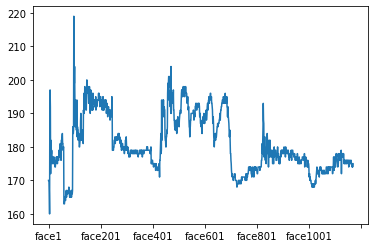

In [20]:
df_y.iloc[3].plot()